# Klimadatei (.csv) einlesen und analysieren

Zunächst werden die für dieses Jupyter Notebook benötigten Libraries geladen:

In [28]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

<Figure size 1000x500 with 0 Axes>

## .csv-Datei als *DataFrame* einlesen

Im Folgenden Nutzen wir globale Klimadaten, die auf der Webseite der NASA zu finden sind: https://data.giss.nasa.gov/gistemp/. Hierbei handelt es sich um Temperaturdaten, die Anomalien gegenüber dem Mittelwert in den Jahren 1951-1980 aufweisen.
Es werden Daten von Dateien (online oder offline) eingelesen mit der Python Bilbiothek `pandas`. Die Daten werden in sogenannten *DataFrames* hier mit dem Namen `global_mean` abgespeichert. 

In [29]:
#link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"
link = 'data/graph.csv'
global_mean = pd.read_csv(link, header = 1) 

Wir geben das *DataFrame* aus um uns die Messdaten einmal anzusehen: 

In [30]:
global_mean.head(6) # Ausgabe der ersten 5 Spalten
#global_mean.tail(5) # Ausgabe der letzten 5 Spalten
#global_mean # Ausgabe des DataFrames 

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24
5,1885,-0.33,-0.26


In der ersten Spalte befinden sich lediglich die Indizes der Messungen. Die zweite Spalte beinhaltet das Jahr und die dritte Spalte zeigt den gemessenen globalen Temperaturunterschied im Vergleich zur gemittelten Temeratur der Jahre 1951-1980. Die letzte Spalte zeigt die gleichen Messwerte, jedoch gefiltert. 

Einzelne Spalten kann man sich anzeigen lassen, indem den Spaltel-Namen des zugehörigen *DataFrames* nutzt:

In [31]:
global_mean['Year']

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
137    2017
138    2018
139    2019
140    2020
141    2021
Name: Year, Length: 142, dtype: int64

## Daten plotten mit 'matplotlib'

Als Beispiel für eine gelungene grafische Darstellung wollen wir die beiden Spalten, *No_Smoothing* and *Lowess(5)* gegenüber der Zeitachse *Year* plotten. Hierfür benützen wir die Python Library `matplotlib`. Einmal geplottet kann das zuletzt angezeigte Diagramm in verschiedenen Formaten mit `plt.savefig('klima_plot1.png')` abgespeichert werden. Wenn nicht anders angegeben, wird die Datei im gleichen Ordner angelegt. 

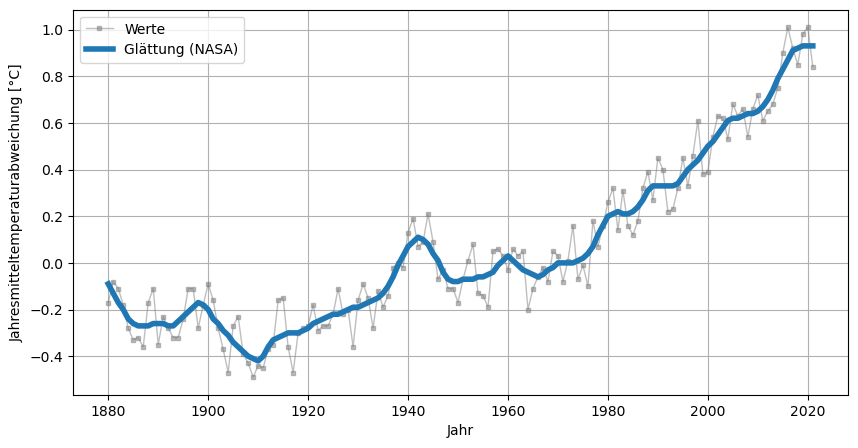

In [51]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();
plt.savefig('klima_plot1.png')
plt.savefig('klima_plot1.pdf')

## Daten verarbeiten
Die Bibliothek `pandas` ist sehr umfangreich und wird viel zur Datenverarbeitung genutzt. Im folgenden dazu einige Beispiele:

### Statistische Größen: Mittelwert, Standardabweichung, Min, Max

Für jede Spalte lassen sich statistische Größen wie z.B. die Anzahl der Einträge pro Spalte, deren Mittelwert, Standardabweichung, Minimal- und Maximalwert bestimmen:

In [34]:
global_mean.describe()

,Year,No_Smoothing,Lowess(5)
count,142.000000,142.000000,142.000000
mean,1950.500000,0.053169,0.053169
std,41.135953,0.364161,0.352324
min,1880.000000,-0.490000,-0.420000
25%,1915.250000,-0.200000,-0.227500
50%,1950.500000,-0.065000,-0.040000
75%,1985.750000,0.252500,0.235000
max,2021.000000,1.010000,0.930000


### Maximum und zugehöriges Jahr ausgeben

Dies können wir benutzen, um beispielsweise die *maximale Temperaturdifferenz* zu ermitteln:

In [35]:
global_mean["No_Smoothing"].max()

1.01

Wenn wir wissen wollen, *wann* diese *maximale Temperaturdifferenz* auftrat, muss der zugehörige Index dieses Events gespeichert werden:

In [36]:
index_max = global_mean["No_Smoothing"].idxmax()
print(index_max)

136


Diesen Index können wir nun benutzen, um mittels `.loc` Befehl den Eintrag zu diesem Index auszugeben:

In [37]:
global_mean.loc[index_max]

Year            2016.00
No_Smoothing       1.01
Lowess(5)          0.87
Name: 136, dtype: float64

### Daten aufsteigend/absteigend sortieren

Mit `.sort_values("Spaltenname")` können wir auch die Tabelle nach dem definierten Spaltennamen sortieren (standardmäßig in **ansteigender** Reihenfolge):

In [38]:
global_mean.sort_values("No_Smoothing")

,Year,No_Smoothing,Lowess(5)
29,1909,-0.49,-0.41
24,1904,-0.47,-0.31
37,1917,-0.47,-0.30
31,1911,-0.45,-0.40
30,1910,-0.44,-0.42
...,...,...,...
135,2015,0.90,0.83
137,2017,0.92,0.91
139,2019,0.98,0.93
140,2020,1.01,0.93


Mit `ascending=False` wird absteigend sortiert:

In [39]:
global_mean.sort_values("No_Smoothing", ascending = False)

,Year,No_Smoothing,Lowess(5)
140,2020,1.01,0.93
136,2016,1.01,0.87
139,2019,0.98,0.93
137,2017,0.92,0.91
135,2015,0.90,0.83
...,...,...,...
30,1910,-0.44,-0.42
31,1911,-0.45,-0.40
24,1904,-0.47,-0.31
37,1917,-0.47,-0.30


**WICHTIG**: Der Dataframe `global_mean` wird dadurch nicht verändert, es handelt sich nur um eine Anzeige!

## Daten glätten

Die von der NASA verwendete Glättung ist die **LO**cally **WE**ighted **S**catter-plot **S**moother (LOWESS). Dabei wird in einem lokal zu definierenden Bereich eine lineare Regression durchgeführt. Eine genauere Erklärung zur Methode findet ihr auf [Youtube](https://youtu.be/b7oryuMP3r8).

Es gibt natürlich viele Methoden und Filter, um Daten zu glätten. Wir wollen nun versuchen, die Methode der NASA zu rekonstruieren. Hierfür benutzen wir die Python Library `statsmodels` und erstellen eine weitere Spalte `Lowess(own)` in unserem DataFrame `global_mean`. In diese Spalte schreiben wir die geglätteten Werte von den Rohdaten `global_mean["No_Smoothing"]` indem wir die Funktion `lowess` aufrufen. Details zu Nutzung der Funktion findet ihr [https://www.statsmodels.org](https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html):
- an erster Stelle in der Funktion werden die Y-Werte eingegeben, hier `global_mean["No_Smoothing"]`
- an zweiter Stelle in der Funktion werden die X-Werte eingegeben, hier `global_mean["Year"]`
- die Option `frac` ist eine Zahl zwischen 0 und 1. Dies ist der Anteil der Daten, der bei der Schätzung der einzelnen y-Werte verwendet wird. 
- Ausgegeben wird zweidimensionalas Array. Die erste Spalte enthält die sortierten x-Werte und die zweite Spalte die zugehörigen geschätzten y-Werte. Um die zweite Spalte in den DataFrame zu speichern, wählen wir diese mit `[:,1]` aus.

In [40]:
from statsmodels.nonparametric.smoothers_lowess import lowess
global_mean["Lowess(own)"] = lowess(global_mean["No_Smoothing"],global_mean["Year"], frac=1/14)[:,1]

In [41]:
global_mean

,Year,No_Smoothing,Lowess(5),Lowess(own)
0,1880,-0.17,-0.09,-0.092698
1,1881,-0.08,-0.13,-0.129873
2,1882,-0.11,-0.17,-0.167172
3,1883,-0.18,-0.20,-0.203172
4,1884,-0.28,-0.24,-0.239029
...,...,...,...,...
137,2017,0.92,0.91,0.911976
138,2018,0.85,0.92,0.921410
139,2019,0.98,0.93,0.926072
140,2020,1.01,0.93,0.929365


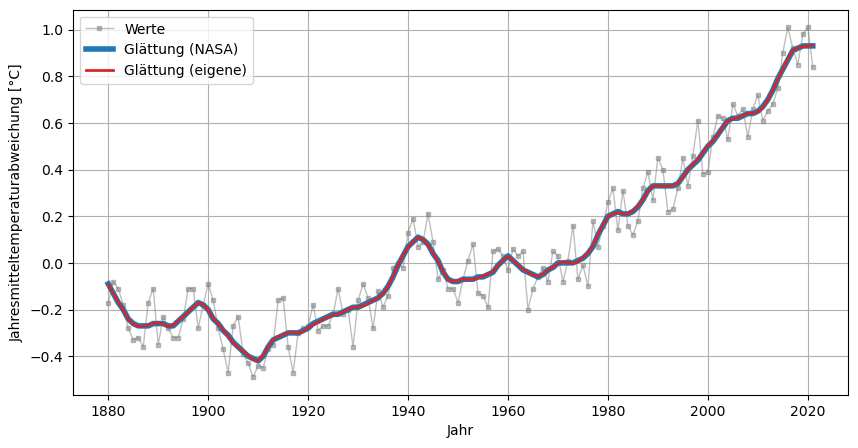

In [42]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.plot(global_mean["Year"],global_mean["Lowess(own)"], lw=2,ls='-' ,  color="tab:red", label="Glättung (eigene)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

## Messunsicherheiten als Fehlerbalken hinzufügen

Bei diesem Datenset stehen uns leider keine Messunsicherheiten zur Verfügung. Um Sie jedoch als Fehlerbalken miteinzubeziehen, wollen wir im Folgenden annehmen, dass der Temperaturunterschied auf 0.25K genau messen werden konnte und fügen die unserem Datensatz hinzu:

In [43]:
global_mean["uncertainty"] = 0.25
print(global_mean)

     Year  No_Smoothing  Lowess(5)  Lowess(own)  uncertainty
0    1880         -0.17      -0.09    -0.092698         0.25
1    1881         -0.08      -0.13    -0.129873         0.25
2    1882         -0.11      -0.17    -0.167172         0.25
3    1883         -0.18      -0.20    -0.203172         0.25
4    1884         -0.28      -0.24    -0.239029         0.25
..    ...           ...        ...          ...          ...
137  2017          0.92       0.91     0.911976         0.25
138  2018          0.85       0.92     0.921410         0.25
139  2019          0.98       0.93     0.926072         0.25
140  2020          1.01       0.93     0.929365         0.25
141  2021          0.84       0.93     0.931468         0.25

[142 rows x 5 columns]


Grafisch darstellen tun wir Messunsicherheiten mittels Fehlerbalken und der Matplotlib-Funktion `plt.errorbar`. 

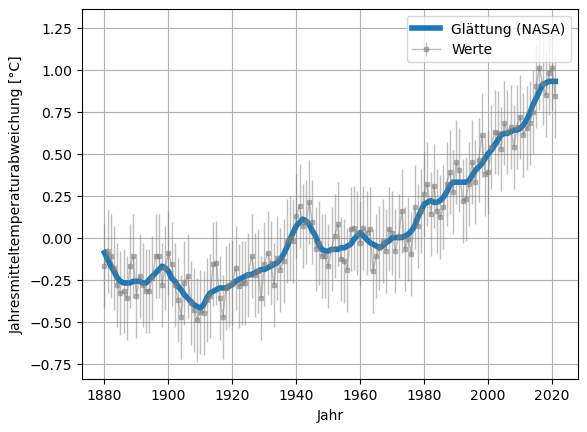

In [44]:
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

## Ausgleichsgerade berechnen und plotten

Mittels linearer Regression kann der Temperaturanstieg aus den Daten berechnet werden. Hierfür wird die Python Library `numpy` benutzt und die Funktion `polyfit` aufgerufen und in als `model` gespeichert. Diese Funktion benutzt die Least-Square Methode für polynomische Modelle. Weitere Informationen zu der Funktion findet ihr [hier](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Mit der Option `cov=True` wird die Kovarianz-Matrix berechnet, welche die Unsicherheiten für die Fit-Parameter beinhaltet. 

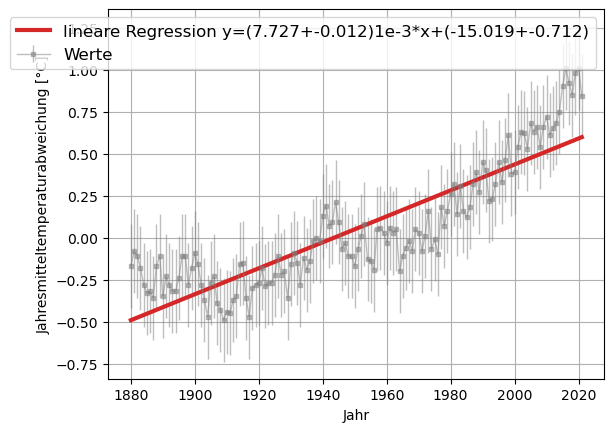

In [45]:
import numpy as np
import pandas as pd

x=global_mean["Year"]
y=global_mean["No_Smoothing"]
y_err = global_mean["uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression

plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.legend(fontsize=12);
plt.grid();

Das Model beinhaltet zwei Matrizen:

In [46]:
model

(array([ 7.72740894e-03, -1.50191421e+01]),
 array([[ 1.33257719e-07, -2.59919181e-04],
        [-2.59919181e-04,  5.07196269e-01]]))

Im ersten Array stehen die Fit-Parameter der linearen Ausgleichsgeraden entsprechend der obigen Deklaration: `y_model = model[0][0]*x+model[0][1]`.
Im zweiten Array, hier eine 2x2 Matrix, sind die Unsicherheiten in Form von der [Kovarianz-Matrix](sec_korr_cov) dargestellt.
Der Temperaturanstieg kann entsprechend ausgegeben werden:

In [47]:
print(f"Temperaturanstieg pro Jahr (von 1981 bis 2020): {model[0][0]:.3f}°C/Jahr")
print(f"Temperaturanstieg seit Beginn der Messung: {(y_model.iloc[-1]-y_model.iloc[0]):.3f}°C")

Temperaturanstieg pro Jahr (von 1981 bis 2020): 0.008°C/Jahr
Temperaturanstieg seit Beginn der Messung: 1.090°C


```{warning}
Die lineare Regression bezieht hier den ganzen Zeitraum mit ein! Im folgenden betrachten wir für den Temperaturgradienten nur die Daten von 1980 bis 2020!
```

In [48]:
x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]

model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0][0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.019°C/Jahr


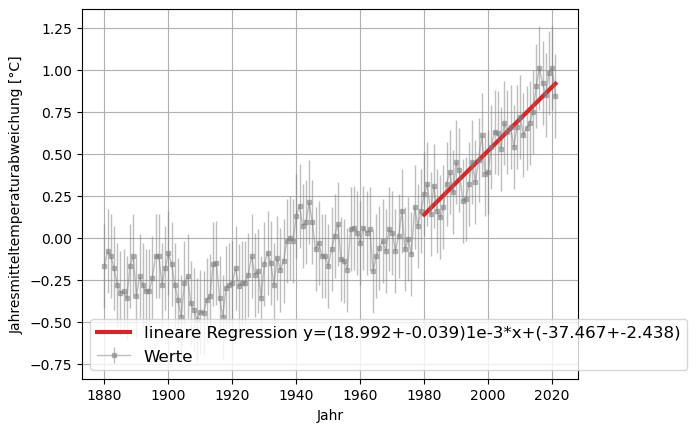

In [49]:
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.legend(fontsize=12);
plt.grid();

## Logarithmische Darstellung

In der Messtechnik können unter Umständen Messwerte in ganz unterschiedlichen Größenordnungen anfallen. Für eine Darstellung im Diagramm, bei dem die Achsen typischerweise eine feste Einheit besitzen, nutzt man die logarithmischen Darstellung. Hierfür gibt es zwei Möglichkeiten:
* die Achsen können doppel- oder halb-logarithmisch eingestellt 
* die Messwerte werden in logarithmische Einheiten umgerechnet und dann linear aufgetragen

### Synthetische Daten generieren

Um dies zu veranschaulichen zeichnen wir Bode Plots (kommt noch später in der Vorlesung). Jetzt muss erst mal nur bekannt sein, dass es sich hierbei um 2 Datensätzen handelt, Amplitude und Phase, die jeweils über die Frequenz grafisch dargestellt werden. Solche Art von Diagrammen sind eventuell schon aus der Mechanik bekannt.

Um die Daten, die wir plotten möchten, zu modellieren, muss dafür die Library `scipy.signal` importiert werden:

In [53]:
import scipy.signal as signal

Wir erstellen 1 Datensatz für ein bestimmtes Messsystem, hier einen Tiefpass:
* `w` gibt die Frequenz in Hz an
* `mag` gibt die Amplitude in dB an
* `phase` gibt die Phase in Grad an

In [54]:
# Transfer Funktion für das Model eines Tiefpasses:
num = np.array([1])
den = np.array([1 , 1])
H = signal.TransferFunction(num , den)

# Bode-Plot Daten:
w, mag, phase = signal.bode(H)

Die Daten können wir wieder in `dataframes` abspeichern, wenn das Arbeiten mit den Objekten für euch angenehmer ist.

In [75]:
data = {"frequenz": w, "amplitude": mag, "phase": phase}
data_df = pd.DataFrame(data)
print(data_df)

     frequenz  amplitude      phase
0    0.010000  -0.000434  -0.572939
1    0.010723  -0.000499  -0.614340
2    0.011498  -0.000574  -0.658733
3    0.012328  -0.000660  -0.706333
4    0.013219  -0.000759  -0.757372
..        ...        ...        ...
95   7.564633 -17.650996 -82.469498
96   8.111308 -18.247330 -82.971773
97   8.697490 -18.844914 -83.441178
98   9.326033 -19.443588 -83.879746
99  10.000000 -20.043214 -84.289407

[100 rows x 3 columns]


### Halb-Logarithmische Darstellung

* **Subplots:** Für das Bode Diagramm benötigen wir zwei Diagramme untereinander. Dafür erzeugen wir ein Figure mit Unterdiagrammen, so genannten `subplots`. Hier benutzen wir den `subplot(2,1,1)`-Befehl. An erster Stelle steht die Anzahl der Reihen, an zweiter Stelle die Anzahl der Spalten und an dritter Stelle in der Funktion die Nummer des Diagramms. 
* **Halblogarithmische Darstellung:** Da die Daten der Amplitude bereits in der Einheit dB vorliegen, reicht uns nun eine halblogarithmische Darstellung für beide Diagramme. Nur die Frequenzachse, also die x-Achse, soll logarithmisch aufgetragen werden und wir benutzen den `plt.semilogx`-Befehl. Würde man nur die Y-Achse logarithmisch wählen, würde man den `plt.semilogy`-Befehl nutzen.
* **Gitter:** Bei logarithmischen Darstellungen bietet es sich häufig an ein Hintergrund-Gitter zu zeichnen. Dies erhalten wir mit dem Befehle `plt.grid()`. Im Beispiel unten sind noch Optionen angegeben: 
    * `lw=0.5` setzt die Linienweite auf 0.5
    * `zorder=0` setzt das Gitter in den 0. Layer (in den Hintergrund)
    * `ls='--'` setzt den Linienstil auf gestrichelt (Alternativen: `=':'` für gepunktet, `='-'` für durchgezogen, `='.-'` für abwechselnd Punkt-Strich)
    * `which='minor'` (bzw. `='major'`) wählt aus welche Gitterlinien gerade angesprochen werden (Hauptgitternetz mit Achsenbeschriftung oder Nebengitternetz)
    * `axis='both'` legt fest, ob das Gitter sowohl auf der x- als auch auf der y-Achse gezeichnet wird. (Alternativen: `axis='x'`)

Zusätzliche dazu findest du unten noch weitere vertikale (`axvline`) und horizontale (`axhline`) Linien, die gezeichnet werden. 

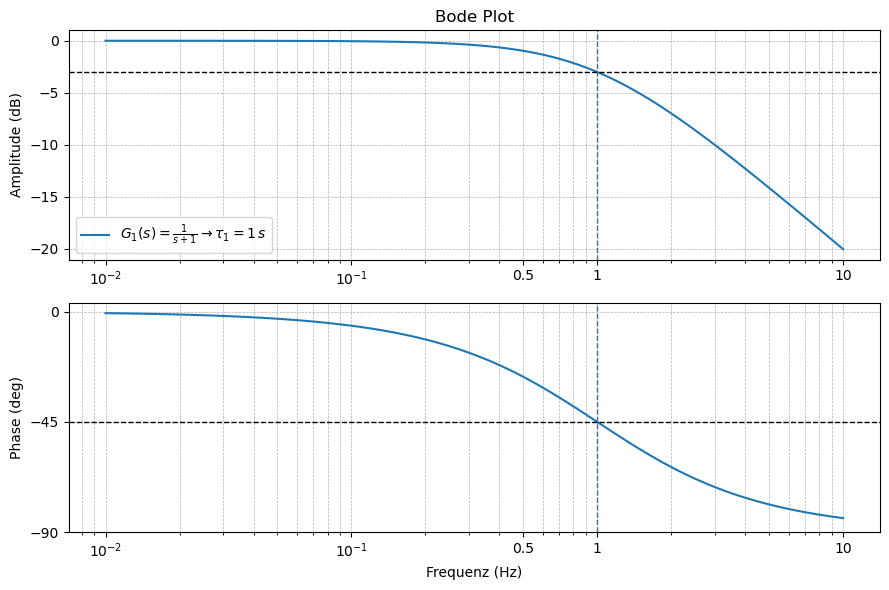

In [77]:
# Plotting
# Supplot2grid approach
fig, ax = plt.subplots(figsize=(9,6))

plt.subplot(2,1,1)
# Nutze DataFrames:
plt.semilogx(data_df["frequenz"], data_df["amplitude"], color='tab:blue', label = r'$G_1(s) = \frac{1}{s+1} \rightarrow \tau_1 = 1\, s $')
plt.axhline(y = -3, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.title("Bode Plot")
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.ylabel("Amplitude (dB)")
plt.legend()

plt.subplot(2,1,2)
# Nutze die Array-Daten statt des Dataframes (genau das gleiche...)
plt.semilogx(w, phase, color='tab:blue')
plt.axhline(y = -45, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
plt.yticks([0,-45,-90])
plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.xlabel("Frequenz (Hz)")
plt.ylabel('Phase (deg)')

fig.tight_layout()

### Doppellogarithmische Darstellung

Zur Übung rechnen wir die dB Daten in Volt um...

In [83]:
data_df["amplitude_V"] = 10**(data_df["amplitude"]/20)

... und zeichnen die Amplitude mit dem `plt.loglog`-Befehl in ein doppelogarithmisches Diagramm:

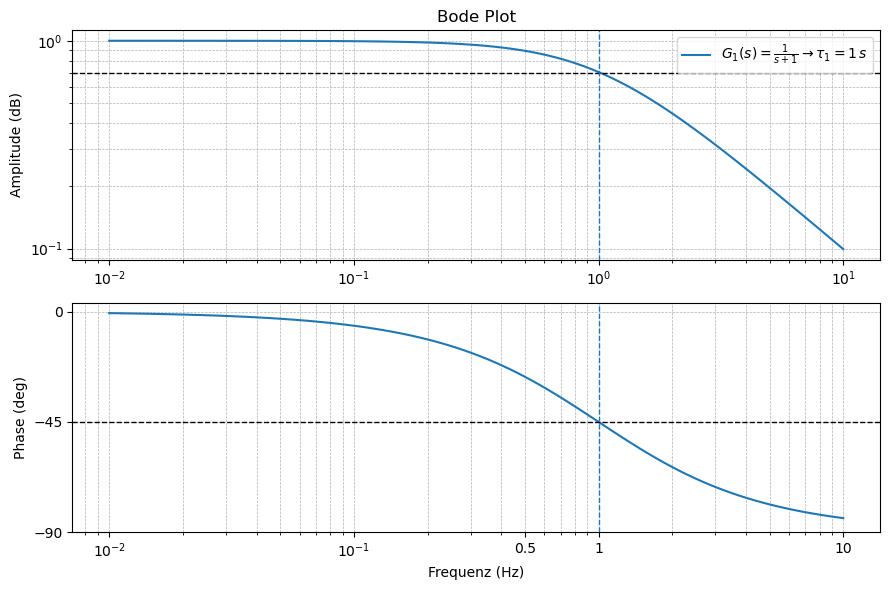

In [86]:
# Plotting
# Supplot2grid approach
fig, ax = plt.subplots(figsize=(9,6))

plt.subplot(2,1,1)
# Nutze DataFrames:
plt.loglog(data_df["frequenz"], data_df["amplitude_V"], color='tab:blue', label = r'$G_1(s) = \frac{1}{s+1} \rightarrow \tau_1 = 1\, s $')
plt.axhline(y = 0.7, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
#plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.title("Bode Plot")
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.ylabel("Amplitude (dB)")
plt.legend()

plt.subplot(2,1,2)
# Nutze die Array-Daten statt des Dataframes (genau das gleiche...)
plt.semilogx(w, phase, color='tab:blue')
plt.axhline(y = -45, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
plt.yticks([0,-45,-90])
plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.xlabel("Frequenz (Hz)")
plt.ylabel('Phase (deg)')

fig.tight_layout()